<a href="https://colab.research.google.com/github/mateofra/CUANTICA/blob/main/02.%20Bits%20y%20C%C3%BAbits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalamos qiskit en el notebook
!pip install qiskit[visualization] qiskit-aer qiskit_ibm_runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=2cf63889a5467bef7ee1dc7e59b76c2fe41f995648471f2e353dbdbbb9f0f0e3
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178b

In [3]:
import qiskit
import qiskit_aer
import qiskit_ibm_runtime
print('Qiskit version ',qiskit.__version__)
print('Aer simulator version ', qiskit_aer.__version__)
print('Qiskit IBM Runtime version ', qiskit_ibm_runtime.__version__)

Qiskit version  2.3.0
Aer simulator version  0.17.2
Qiskit IBM Runtime version  0.45.0


#**02. Bits y Cúbits**

Contenidos

1. [Bits y puertas clásicas](#clasico)
    - [Bits clásicos como vectores](#bits)
    - [Puertas clásicas como matrices](#clasicas)
    - [Computación reversible](#reversible)
2. [Bits cuánticos o cúbits](#cubits)
    - [Vector de estado](#statevector)
    - [Esfera de Bloch](#bloch)
    - [Sistemas multicúbit](#multicubit)
2. [Puertas cuánticas](#cuanticas)
    - [Puertas cuánticas de 1 cúbit](#uncubit)
    - [Puertas controladas](#controladas)
3. [Estados entrelazados (_entangled_)](#entangled)
3. [Medida del estado](#medida)
    - [Observables y valor esperado](#observables)
    - [Errores, matrices de densidad y estados mezcla](#errores)

Ejercicios

1. [Ejercicio entregable 1: Vector de estado](#e1)
1. [Ejercicio entregable 2: Función lógica](#e2)
1. [Ejercicio entregable 3: Creación de estados de Bell](#e3)

<a name="clasico"></a>
# **Bits y puertas clásicas**

Comenzaremos viendo cómo se pueden expresar operaciones sobre bits clásicos como operaciones de matrices y vectores. De esta forma, podemos ver los bits cuánticos como una generalización de los clásicos.

También veremos el concempo de computación reversible, imprescindible en computación cuántica.

<a name="bits"></a>
## Bits clásicos como vectores

Podemos expresar 1 bit clásico como un vector de tamaño 2:

 $$
|b\rangle = \begin{bmatrix}p_0 \\p_1 \end{bmatrix}
$$

con $p_i \in \{0,1\}$ y $p_0+p_1 = 1$.

Así:

$$
|0\rangle = \begin{bmatrix}1 \\0 \end{bmatrix}\qquad |1\rangle = \begin{bmatrix}0 \\1 \end{bmatrix}
$$

## Múltiples bits

Un número de 2 bits $|ab\rangle$, con $a,b\in\{0,1\}$ se puede expresar como el producto tensor de los bits individuales:

$$
|ab\rangle = |a\rangle\otimes |b\rangle = \begin{bmatrix}a_{0} \\ a_{1}\end{bmatrix}\otimes \begin{bmatrix}b_{0} \\ b_1\end{bmatrix} = \begin{bmatrix} a_{0}b_0\\ a_0b_1 \\ a_1b_0 \\ a_1b_1\end{bmatrix} = \begin{bmatrix} p_{0}\\ p_1 \\ p_2 \\ p_{3}\end{bmatrix}
$$

con $p_i \in \{0,1\}$. Es fácil verificar que se sigue manteniendo: $p_0+p_1+p_2+p_3 = 1$.

----------------------------

**Ejemplo:**


$$
|00\rangle = |0\rangle\otimes |0\rangle = \begin{bmatrix}1 \\ 0\end{bmatrix}\otimes \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}1 \\ 0 \\ 0 \\ 0\end{bmatrix}\\
|01\rangle = |0\rangle\otimes |1\rangle  = \begin{bmatrix}1 \\ 0\end{bmatrix}\otimes \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 1 \\ 0 \\ 0\end{bmatrix}\\
|10\rangle = |1\rangle\otimes |0\rangle  = \begin{bmatrix}0 \\ 1\end{bmatrix}\otimes \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}0 \\ 0 \\ 1 \\ 0\end{bmatrix}\\
|11\rangle = |1\rangle\otimes |1\rangle = \begin{bmatrix}0 \\ 1\end{bmatrix}\otimes \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 0 \\ 0 \\ 1\end{bmatrix}\\
$$

----------------------------

Podemos escribir por tanto:

$$
|ab\rangle = \begin{bmatrix} p_{0}\\ p_1 \\ p_2 \\ p_{3}\end{bmatrix} = p_0|00\rangle + p_1|01\rangle + p_2 |10\rangle + p_3|11\rangle
$$

En general, vamos a poder escribir un número de $n$ bits como:
$$
|B\rangle = p_0|00\ldots00\rangle +p_1|00\ldots01\rangle + p_2|00\ldots10\rangle +\cdots + p_{2^n-1} |11\ldots11\rangle= \sum_{i=0}^{2^{n}-1}p_i |i\rangle
$$

con $p_i \in \{0,1\}$ y $\sum_{i=0}^{n-1}p_i = 1$, siendo $p_i$ la probabilidad de que el número sea $i$.

<a name="clasicas"></a>
## Puertas clásicas como matrices

Podemos representar las puertas lógicas clásicas como matrices u operadores, tales que aplicados a un número binario obtienen un número binario.

Por ejemplo:

$$
\begin{aligned}
\text{NOT} &= \begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix}\\[10pt]
\text{AND} &= \begin{bmatrix}1 & 1 & 1 & 0\\ 0 & 0 & 0 & 1\end{bmatrix}\\[10pt]
\text{OR} &= \begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}\\[10pt]
\end{aligned}
$$

Ejemplos:

$$
\begin{aligned}
\text{NOT}|0\rangle &= \begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix}
\begin{bmatrix} 1\\ 0\end{bmatrix} = \begin{bmatrix} 0\\ 1\end{bmatrix} = |1\rangle
\\[10pt]
\text{AND}|11\rangle &= \begin{bmatrix}1 & 1 & 1 & 0\\ 0 & 0 & 0 & 1\end{bmatrix}
\begin{bmatrix} 0\\ 0\\0\\1\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix} = |1\rangle \\[10pt]
\text{AND}|01\rangle &= \begin{bmatrix}1 & 1 & 1 & 0\\ 0 & 0 & 0 & 1\end{bmatrix}
\begin{bmatrix} 0\\ 1\\0\\0\end{bmatrix} = \begin{bmatrix} 1\\ 0\end{bmatrix} = |0\rangle \\[10pt]
\text{OR}|10\rangle &= \begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}
\begin{bmatrix} 0\\ 0\\1\\0\end{bmatrix} = \begin{bmatrix} 0\\1\end{bmatrix} = |1\rangle \\[10pt]
\text{OR}|11\rangle &= \begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}
\begin{bmatrix} 0\\ 0\\0\\1\end{bmatrix} = \begin{bmatrix} 0\\1\end{bmatrix} = |1\rangle\\[10pt]
\end{aligned}
$$

Podemos obtener la representación de un conjunto de puertas mediante operaciones de matrices. Por ejemplo:

<center><img src="https://drive.google.com/uc?export=view&id=1ZwHOf-211JlZGff4w8GhFTatdJBtYrUC" alt="Circuito con puertas clasicas" width="300"  /></center>

La matriz equivalente a este circuito es:

$$
\text{OR}\cdot (\text{NOT}\otimes \text{AND}) =
\begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}
\left(
\begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix}\otimes
\begin{bmatrix}1 & 1 & 1 & 0\\ 0 & 0 & 0 & 1\end{bmatrix}
\right) = \\[10pt]
\begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}
\begin{bmatrix}
0 & 0 & 0 & 0 & 1 & 1 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
1 & 1 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{bmatrix} =
\begin{bmatrix}
0 & 0 & 0 & 0 & 1 & 1 & 1 & 0\\
1 & 1 & 1 & 1 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

Es decir, las puertas en paralelo se combinan usando el producto tensor y en serie el producto matricial.

<a name="reversible"></a>
## Computación reversible

La [computación reversible](https://en.wikipedia.org/wiki/Reversible_computing) es un modelo de computación en el que cada paso del proceso es reversible: a partir de la salida es posible reconstruir la entrada.

El [principio de Landauer](https://en.wikipedia.org/wiki/Landauer%27s_principle) establece que borrar un bit de información tiene un coste energético mínimo inevitable, proporcional a $kT\ln⁡ 2$, donde $k$ es la constante de Boltzmann y $T$ la temperatura. La computación reversible no borra la información, por lo que podría, en el límite ideal, realizar cálculos con un consumo de energía arbitrariamente bajo.

La empresa [Vaire](https://vaire.co/) quiere usar esta propiedad para crear chips con menor consumo.

El modelo clásico de computación reversible substituye las puertas clásicas por sus equivalentes reversibles:

<center><img src="https://drive.google.com/uc?export=view&id=1kZGt2hLqpdlg6YTOfy9xOTWb3y9UX_FV" alt="Puertas reversibles" width="500"  /></center>

Al bit auxiliar en la AND y NAND se le llama *bit ancilla*.

Se puede demostrar que el uso de
La [puerta Toffoli](https://en.wikipedia.org/wiki/Toffoli_gate) es universal: cualquier circuito booleano se puede expresar usando solo puertas Toffoli.

Otra puerta universal reversible es la [puerta Fredkin](https://en.wikipedia.org/wiki/Fredkin_gate) o Controlled-SWAP:

<center><img src="https://drive.google.com/uc?export=view&id=1ySJHdoVX3aTAc7DPSu9WsNRY8ehay0Wv" alt="Puerta Fredkin" width="100"  /></center>

La matriz de una puerta CNOT es:

$$ CNOT =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{bmatrix}
$$

Así, si $|BA\rangle = |01\rangle$:

$$ CNOT|BA\rangle = CNOT|01\rangle =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{bmatrix}
\begin{bmatrix}0 \\1\\0\\0 \end{bmatrix} = \begin{bmatrix}0 \\ 0 \\ 0 \\ 1 \end{bmatrix} = |11\rangle
$$

Se puede comprobar que $CNOT = CNOT^{-1}$

### Convertir puertas irreversibles en reversibles

Cualquier puerta que implemente una función $f(x)$, con $x\in \{0,1\}^n$ puede convertirse en reversible usando bits ancilla:

<center><img src="https://drive.google.com/uc?export=view&id=1ckdPqv6_TpfSsTsqwCdAb7bPLpg0E7RA" alt="Puertas reversible" width="300"  /></center>





---



---



---



<a name="cubits"></a>
# **Bits cuánticos o cúbits**

<a name="statevector"></a>
## Vector de estado

Un cúbit puede verse como una generalización de un bit, representandose mediante un vector, denominado **vector de estado**:

$$
|\psi\rangle = \begin{bmatrix}a_0 \\a_1 \end{bmatrix}
$$

con $a_i \in \mathbb{C}$ y $|a_0|^2+|a_1|^2 = 1$.

$a_0$ y $a_1$ son [amplitudes de probabilidad](https://en.wikipedia.org/wiki/Probability_amplitude).

Los valores $|a_0|^2$ y $|a_1|^2$ representan la **probabilidad** de que al medir el cúbit obtengamos un 0 o un 1.


**Base canónica**

Como seguimos teniendo:

$$
|0\rangle = \begin{bmatrix}1 \\0 \end{bmatrix}\qquad |1\rangle = \begin{bmatrix}0 \\1 \end{bmatrix}
$$

podemos escribir:

$$
|\psi\rangle = a_0|0\rangle + a_1|1\rangle
$$

Matemáticamente, $|\psi\rangle$ es un vector unitario en un [espacio de Hilbert](https://en.wikipedia.org/wiki/Hilbert_space) de componentes complejas bidimensional denominado _espacio de estados_.

La base canónica de este espacio es $\{|0\rangle,|1\rangle\}$ (también llamada base estándar o base computacional).

----------------------------

**Ejemplos**

1. $|\psi\rangle=|0\rangle,\quad |\psi\rangle=|1\rangle$
2. $|\psi\rangle=|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle),\quad |\psi\rangle=|-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$
3. $|\psi\rangle=|\!\!\circlearrowleft\rangle \equiv |+i\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+e^{i\frac{\pi}{2}}|1\rangle) = \tfrac{1}{\sqrt{2}}(|0\rangle+i|1\rangle),\quad |\psi\rangle=|\!\!\circlearrowright\rangle =  |-i\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+e^{-i\frac{\pi}{2}}|1\rangle) = \tfrac{1}{\sqrt{2}}(|0\rangle-i|1\rangle)$

----------------------------

Tanto $\{|+\rangle, |-\rangle\}$ como $\{|\!\!+i\rangle, |\!\!-i\rangle\}$ son bases del espacio de Hilbert.

<a name="bloch"></a>
## Esfera de Bloch

Si en el vector de estado anterior usamos la forma polar para $a_0$ y $a_1$:

$$
|\psi\rangle = |a_0|e^{i\varphi_0}|0\rangle + |a_1|e^{i\varphi_1}|1\rangle =
e^{i\varphi_0}\left[|a_0||0\rangle + |a_1|e^{i(\varphi_1-\varphi_0)}|1\rangle\right]
$$

El término $e^{i\varphi_0}$ es una fase global que no tiene significado físico y se puede eliminar.

Además, como $|a_0|^2+|a_1|^2 = 1$ existe un $\theta\in \mathbb{R}, 0\le\theta\le\pi$ tal que:

$$
|a_0| = \cos{\tfrac{\theta}{2}}\\
|a_1| = \sin{\tfrac{\theta}{2}}
$$

Si llamamos $\phi = \varphi_1-\varphi_0$ podemos escribir el cúbit como:

$$
|\psi\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$
con $\theta, \phi \in \mathbb{R}, 0\le\theta\le\pi, 0\le\phi\lt2\pi$

Si interpretamos $\theta$ y $\phi$ como [coordenadas esféricas](https://es.wikipedia.org/wiki/Coordenadas_esf%C3%A9ricas) de un vector de módulo $1$, podemos representar el vector de estado de un cúbit como un vector en la superficie de una esfera, conocida como _esfera de Bloch.


<center><img src="https://drive.google.com/uc?export=view&id=1x3wgeVRY8-KFC0g-deFSZFE7x-5M_jPP" alt="Esfera de Bloch" width="600"  /></center>

Las coordenadas cartesianas $(r_x,r_y,r_z)$ de un punto en la esfera de Bloch se obtienen mediante las ecuaciones de cambio de coordenadas (con $|\vec{r}|=1$):

$$
\vec{r} = \begin{pmatrix}
r_x\\r_y\\r_z
\end{pmatrix} =
\begin{pmatrix}
\sin\theta\cos\phi\\\sin\theta\sin\phi\\\cos\theta
\end{pmatrix}
$$
con $r_x,r_y, r_z\in[-1,1]$ y $|\vec{r}| = \sqrt{r_x^2+r_y^2+r_z^2}= 1$

### Estados sobre los ejes


1. $\theta = 0, \phi $ arbitrario $\Rightarrow$
$$|\psi\rangle = \cos(0)|0\rangle +e^{i\phi}\sin(0)|1\rangle = |0\rangle$$ $$\vec{r} = \begin{pmatrix}0\\0\\1\end{pmatrix}$$

1. $\theta = \pi, \phi $ arbitrario $ \Rightarrow$
$$|\psi\rangle = \cos\frac{\pi}{2}|0\rangle +e^{i\phi}\sin\frac{\pi}{2}|1\rangle = |1\rangle$$ $$\vec{r} = \begin{pmatrix}0\\0\\-1\end{pmatrix}$$

1. $\theta = \frac{\pi}{2}, \phi = 0 \Rightarrow $
$$|\psi\rangle = \cos\frac{\pi}{4}|0\rangle +e^{0}\sin\frac{\pi}{4}|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = |+\rangle$$ $$\vec{r} = \begin{pmatrix}1\\0\\0\end{pmatrix}$$

1. $\theta = \frac{\pi}{2}, \phi = \pi \Rightarrow $
$$|\psi\rangle = \cos\frac{\pi}{4}|0\rangle +e^{i\pi}\sin\frac{\pi}{4}|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle) = |-\rangle$$ $$\vec{r} = \begin{pmatrix}-1\\0\\0\end{pmatrix}$$

1. $\theta = \frac{\pi}{2}, \phi = \frac{\pi}{2} \Rightarrow $
$$|\psi\rangle = \cos\frac{\pi}{4}|0\rangle +e^{i\frac{\pi}{2}}\sin\frac{\pi}{4}|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+i|1\rangle) = |+i\rangle$$ $$\vec{r} = \begin{pmatrix}0\\1\\0\end{pmatrix}$$

1. $\theta = \frac{\pi}{2}, \phi = \frac{3\pi}{2} \Rightarrow $
$$|\psi\rangle = \cos\frac{\pi}{4}|0\rangle +e^{i\frac{3\pi}{2}}\sin\frac{\pi}{4}|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle-i|1\rangle) = |-i\rangle$$ $$\vec{r} = \begin{pmatrix}0\\-1\\0\end{pmatrix}$$

### Fase global y relativa<a id="fase"></a>

Como ya mencionamos, el término $e^{i\varphi_0}$ de la ecuación del vector de estado es una **fase global** sin significado físico, es decir, dos estados cuánticos que se diferencian en una fase global son idénticos:

$$
|\psi\rangle \equiv e^{i\varphi}|\psi\rangle \quad \forall \varphi \in \mathbb{R}
$$

El término $e^{i\phi}$ se denomina **fase relativa**, dos estados con diferente fase relativa son diferentes.

Ejemplo:

$$
|1\rangle \equiv e^{i\phi}|1\rangle
$$

$$
\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \neq \tfrac{1}{\sqrt{2}}(|0\rangle + e^{i\phi}|1\rangle)
$$

### Crear y visualizar un vector de estado en Qiskit<a id="qiskit"></a>

Como ya hemos visto, Qiskit proporciona el método [Statevector](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html) para crear y visualizar vectores de estado arbitrarios.

In [4]:
from qiskit.quantum_info import Statevector
from math import sqrt

# Crear un estado cuántico en qiskit
𝜓 = Statevector([1/sqrt(2), 1j/sqrt(2)])

# Visualizamos el estado
𝜓.draw('latex', prefix="|𝜓\\rangle = ")

<IPython.core.display.Latex object>

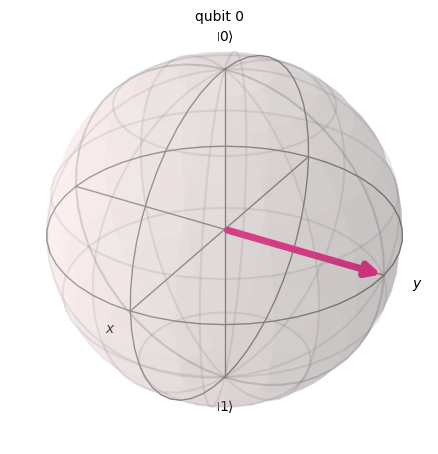

In [5]:
# Visualización sobre la esfera de Bloch
𝜓.draw('bloch')

In [6]:
# Definimos una función para visualizar el estado y la esfera a la vez
def muestra_estado(estado):
    display(estado.draw('latex', prefix="|𝜓\\rangle = "))
    display(estado.draw('bloch'))

<IPython.core.display.Latex object>

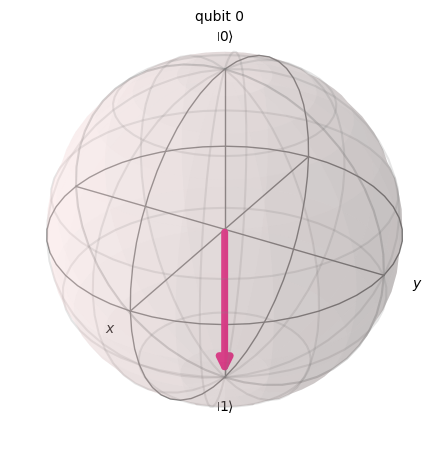

In [7]:
# Ejemplo de vector de estado |1>
𝜓 = Statevector([0, 1])
muestra_estado(𝜓)



---



---



<a name="e1"></a>
# **✍️ Ejercicio entregable 1: Vector de estado**

a) Crea un estado con un 30% de probabilidad de medir un 0 y 70% de medir un 1 y muestra el vector de estado y la esfera de Bloch.

b) Obtén los valores de $\theta$ y $\phi$ para este estado.

In [8]:
# Apartado a
a0 = None # @param {type:"raw"}
a1 = None # @param {type:"raw"}
estado30_70 = Statevector([a0,a1])
muestra_estado(estado30_70)

<IPython.core.display.Latex object>

StopIteration: 

<Figure size 480x480 with 1 Axes>

In [9]:
# Apartado b
from math import acos,cos,sin,e,pi
theta = None # @param {type:"raw"}
phi = None # @param {type:"raw"}

# Para verificar que va bien,
# crea el estado a partir de los ángulos
# y comprueba que es el mismo de antes
estado2_30_70 = Statevector([cos(theta/2), e**(1j*phi)*sin(theta/2)])
muestra_estado(estado2_30_70)

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [10]:
# Comprobamos el resultado calculando las probabilidades (probar a cambiar el valor de phi)
a0 = estado2_30_70.data[0]
a1 = estado2_30_70.data[1]
p0 = abs(a0)**2
p1 = abs(a1)**2
print(f"Probabilidad 0 = {p0}\nProbabilidad 1 = {p1}\n")

# Otra forma
p = estado2_30_70.probabilities()
print(f"Probabilidad 0 = {p[0]}\nProbabilidad 1 = {p[1]}")

NameError: name 'estado2_30_70' is not defined



---



---



<a name="multicubit"></a>
## Sistemas multicúbit

El vector de estado de un sistema de $n$ cúbits se puede expresar como una combinación lineal de estados de la forma $|q_{n-1}\ldots q_1q_0\rangle$, con $q_j\in\{0,1\}$ es decir:

$$
|\psi\rangle = a_0|00\ldots00\rangle + a_1|00\ldots01\rangle + a_2|00\ldots10\rangle +\cdots + a_{2^n-1} |11\ldots11\rangle= \sum_{i=0}^{2^{n}-1} a_i |i\rangle
$$
donde $a_i \in \mathbb{C}$ y $\sum_{i=0}^{2^n-1}|a_i|^2 = 1$.

Esto corresponde a un vector de estado de un espacio de Hilbert de dimensión $2^n$, usando la base canónica $\{|00\ldots00\rangle, |00\ldots01\rangle, |00\ldots10\rangle,\ldots|11\ldots11\rangle\}$.


### Sistema de dos cúbits<a id="dos"></a>
La dimensión del espacio es 4 y los vectores de elementos de la base canónica $\{|00\rangle, |01\rangle, |10\rangle, |11\rangle\}$ se obtienen como el producto tensor de los elementos $\{|0\rangle, |1\rangle\}$:

$$
|00\rangle = |0\rangle\otimes|0\rangle = \begin{bmatrix}1\\0\end{bmatrix}\otimes \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}1\\0\\0\\0\end{bmatrix} $$
$$ |01\rangle = |0\rangle\otimes|1\rangle = \begin{bmatrix}1\\0\end{bmatrix}\otimes \begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}0\\1\\0\\0\end{bmatrix}
$$

$$
|10\rangle = |1\rangle\otimes|0\rangle = \begin{bmatrix}0\\1\end{bmatrix}\otimes \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}0\\0\\1\\0\end{bmatrix} $$
$$
|11\rangle = |1\rangle\otimes|1\rangle = \begin{bmatrix}0\\1\end{bmatrix}\otimes \begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}0\\0\\0\\1\end{bmatrix}
$$

Por lo tanto:

$$
|\psi\rangle = a_0\begin{bmatrix}1\\0\\0\\0\end{bmatrix} + a_1\begin{bmatrix}0\\1\\0\\0\end{bmatrix} + a_2\begin{bmatrix}0\\0\\1\\0\end{bmatrix} + a_3\begin{bmatrix}0\\0\\0\\1\end{bmatrix} = \begin{bmatrix}a_0\\a_1\\a_2\\a_3\end{bmatrix} =\\[30pt]
a_0|00\rangle+a_1|01\rangle+a_2|10\rangle+a_3|11\rangle = \\[10pt]
a_0|0\rangle+a_1|1\rangle+a_2|2\rangle+a_3|3\rangle
$$



### Combinación de estados
Sean los cúbits

$$
|\upsilon\rangle = a_0|0\rangle + a_1|1\rangle
$$

$$
|\phi\rangle = b_0|0\rangle + b_1|1\rangle
$$

El vector de estado del estado global formado por los dos cúbits es:

$$
|\psi\rangle = |\upsilon\phi\rangle = |\upsilon\rangle\otimes |\phi\rangle = (a_0|0\rangle + a_1|1\rangle)\otimes (b_0|0\rangle + b_1|1\rangle) = a_0b_0|00\rangle+a_0b_1|01\rangle+a_1b_0|10\rangle+a_1b_1|11\rangle
$$

<p><br></p>
    
----------------------------

**Ejemplo**

Obtener el vector de estado combinación de los cúbits $|+\rangle$ y $|-\rangle$

$$
|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle),\quad |-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle)
$$

$$
|+-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\otimes\tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle) = \tfrac{1}{2}(|00\rangle-|01\rangle+|10\rangle-|11\rangle)=
\begin{bmatrix}\tfrac{1}{2}\\-\tfrac{1}{2}\\\tfrac{1}{2}\\-\tfrac{1}{2}\end{bmatrix}
$$

----------------------------


### Formas de inicializar un estado multicúbit en Qiskit

<IPython.core.display.Latex object>

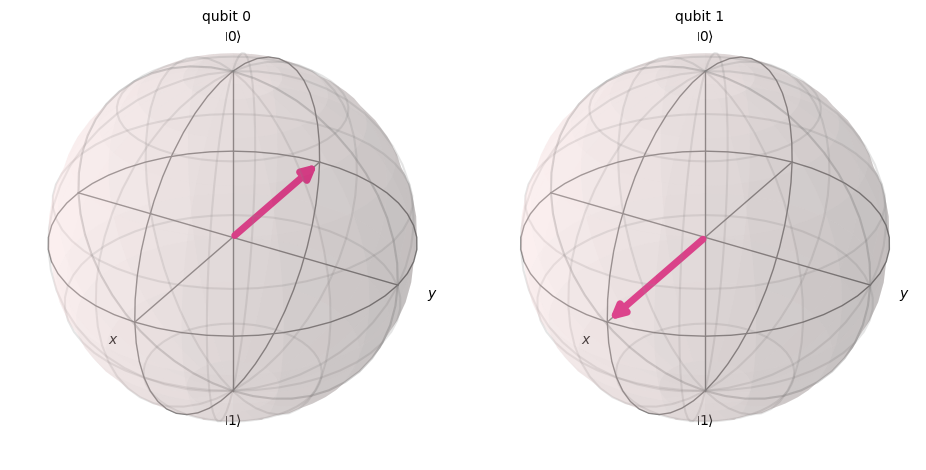

In [11]:
# A partir de una lista
l = [1/2,-1/2,1/2,-1/2]
e = Statevector(l)
muestra_estado(e)

In [12]:
# A partir de los estados |0> y |1>
e0 = Statevector.from_int(0, dims=2)  # dims indica la dimensión del estado
e1 = Statevector.from_int(1, dims=2)

# Producto tensor
e = ((e0^e0)-(e0^e1)+(e1^e0)-(e1^e1))/2
# Alternativa
#e = (e0.tensor(e0)-e0.tensor(e1)+e1.tensor(e0)-e1.tensor(e1))/2

e.draw('latex')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

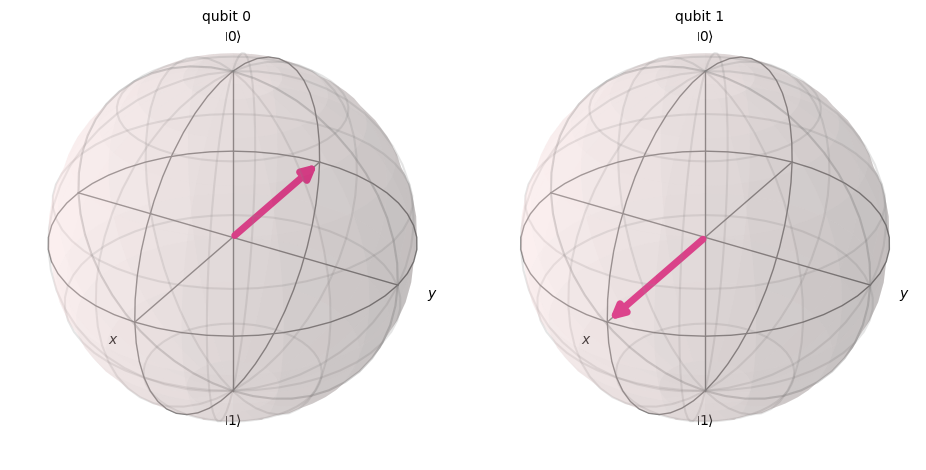

In [13]:
# Combinación de e estados individuales
# Estados individuales
emas = Statevector([1/sqrt(2), 1/sqrt(2)])
emenos = Statevector([1/sqrt(2), -1/sqrt(2)])

emasmenos = emas^emenos
muestra_estado(emasmenos)

<a name="restricciones"></a>
## Restricciones de los cúbits

A la hora de trabajar con cúbits hay que considerar tres restricciones

a. No clonado

b. Reversibilidad

c. Medida destructiva

### No clonado

No es posible obtener un duplicado de un estado cuántico (es decir, no es posible una puerta fan-out)

<center><img src="https://drive.google.com/uc?export=view&id=1FQCVX5DgqV0PdCTOl2UBYX_EYf0Mw--W" alt="No clonado" width="200"/></center>

<details><summary>Pulsa aquí ver una demostración del principio de no-clonado</summary>

Sean $|\psi\rangle$ y $|\phi\rangle$ dos estados cuánticos tales que $|\psi\rangle|\phi\rangle\neq 0$. Supongamos una transformación unitaria $U$ que clona un estado cuántico arbitrario en otro cúbit. $U$ podría definirse como:

$$U(|\psi\rangle|0\rangle) = |\psi\rangle|\psi\rangle$$
$$U(|\phi\rangle|0\rangle) = |\phi\rangle|\phi\rangle$$


Sea $|\varphi\rangle = \frac{1}{\sqrt{2}}(|\psi\rangle+|\phi\rangle)$. Aplicando $U$ a este estado combiando, y dada la linealidad de los operadores cuánticos:

$$
\begin{aligned}
U(|\varphi\rangle|0\rangle) & = \frac{1}{\sqrt{2}}U\left((|\psi\rangle+|\phi\rangle)|0\rangle\right) =  \frac{1}{\sqrt{2}}U\left(|\psi\rangle|0\rangle+|\phi\rangle|0\rangle\right)\\[10pt]
&= \frac{1}{\sqrt{2}}\left(U(|\psi\rangle|0\rangle)+U(|\phi\rangle|0\rangle)\right) =
\frac{1}{\sqrt{2}}\left(|\psi\rangle|\psi\rangle+|\phi\rangle|\phi\rangle\right)
\end{aligned}
$$

Pero por otro lado, dada la definición de $U$:

$$
\begin{aligned}
U(|\varphi\rangle|0\rangle) &= |\varphi\rangle|\varphi\rangle = \frac{1}{2}(|\psi\rangle+|\phi\rangle)(|\psi\rangle+|\phi\rangle)\\[10pt]
&= \frac{1}{2}(|\psi\rangle|\psi\rangle+|\psi\rangle|\phi\rangle+|\phi\rangle|\psi\rangle+|\phi\rangle|\phi\rangle) \neq \frac{1}{\sqrt{2}}\left(|\psi\rangle|\psi\rangle+|\phi\rangle|\phi\rangle\right)
\end{aligned}
$$
</details>

### Reversibilidad

Toda operación realizada sobre un estado cuántico (excepto la medición) tiene que ser reversible.

### Medida destructiva

La medida es destructiva: al medir un estado cuántico, el estado se pierde



---



---



---



<a name="cuanticas"></a>
# **Puertas cuánticas**

Al igual que en ej caso clásico, las puertas cuánticas se pueden expresar como matrices.

Debido al requisito de reversibilidad, las puertas cuánticas **tienen que ser reversibles**.

Además, para que la salida de aplicar una puerta siga siendo un cúbit, la puerta debe conservar la norma del vector.

Puertas que cumplan ambas condiciones se pueden representar mediante matrices unitarias.

Una matriz unitaria $U$ que actúa sobre un estado cuántico de $n$ cúbits es una matriz $2^n\times 2^n$ que verifica  $U^\dagger U = UU^\dagger = I$, siendo $U^\dagger$ la conjugada transpuesta de $U$.

La inversa de $U$ por lo tanto es $U^{-1} = U^\dagger$

Al igual que en el caso clásico, la puerta se aplica al estado mediante un producto matriz-vector:
$$
|\Phi\rangle = U|\psi\rangle = \begin{bmatrix}u_{00} & u_{01} \\ u_{10} & u_{11} \end{bmatrix}\begin{bmatrix}a_{0} \\ a_{1}\end{bmatrix}
$$

<a name="uncubit"></a>
## Puertas cuánticas de 1 cúbit

Para bits, la única puerta de 1 bit es la NOT.

Para cúbits existen, en principio, infinitas puertas que modifican el estado del mismo (todas las matrices unitarias 2x2).

### Puertas (o matrices) de Pauli

$$
\sigma_0\equiv I = \begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}
$$

$$
\sigma_1\equiv\sigma_x\equiv X \equiv NOT = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}
$$

$$
\sigma_2\equiv \sigma_y \equiv Y = \begin{bmatrix}0 & -i\\i & 0\end{bmatrix}
$$

$$
\sigma_3\equiv\sigma_z\equiv Z = \begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}
$$

Estas matrices son involutivas: $X^2=Y^2=Z^2=-iXYZ=I$

----------------------------------------------------------

**Ejemplos**

Puerta X (NOT en base $\{|0\rangle,|1\rangle\}$)

$$
\begin{aligned}
X|0\rangle = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}0 \\ 1\end{bmatrix} = |1\rangle \\[10pt]
X|1\rangle = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}\begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}1 \\ 0\end{bmatrix} = |0\rangle
\end{aligned}
$$

Puerta Z (_phase shift_ de $\pi$ radianes o NOT en base $\{|+\rangle,|-\rangle\}$)

$$
\begin{aligned}
Z|+\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}\begin{bmatrix}1 \\ 1\end{bmatrix} = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ -1\end{bmatrix} = |-\rangle \\[10pt]
Z|-\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}\begin{bmatrix}1 \\ -1\end{bmatrix} = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ 1\end{bmatrix} = |+\rangle
\end{aligned}
$$


### Circuitos de 1 cúbit en Qiskit

En Qiskit, los cúbits se inicializan a $|0\rangle$ por defecto y se aplican puertas para obtener el estado deseado.

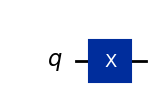

In [14]:
from qiskit import QuantumCircuit
# Circuito de 1 cúbit en el estado |0> con una puerta X
qc = QuantumCircuit(1)

# Aplicamos la puerta X al cúbit
qc.x(0)

qc.draw('mpl')

In [15]:
# Podemos ver el vector de estado resultante de aplicar la puerta X
from qiskit.quantum_info import Statevector

e1 = Statevector.from_circuit(qc)
e1.draw('latex', prefix='X|0\\rangle = ')

<IPython.core.display.Latex object>

In [16]:
# Otra forma de hacerlo
e0 = Statevector.from_label('0')
e1 = e0.evolve(qc)

e1.draw('latex', prefix='X|0\\rangle = ')

<IPython.core.display.Latex object>



---

## 💻 Ejercicio: Puerta Z
Crea un circuito de 1 cúbit en estado $|+\rangle$, aplícale una puerta $Z$ y obtén el vector de estado de salida.

In [ ]:
# Circuito de 1 cúbit en el estado |+> con una puerta Z
from math import sqrt
qc = QuantumCircuit(1)

# Podemos hacer que el estado inicial del circuito sea diferente de |0>
# Inicializa el circuito al estado |+>
qc.initialize(....)

# Aplicamos la puerta Z al cúbit
qc....

# Muestra el circuito y el estado




---



### Aplicación de varias puertas

Al igual que en el caso clásico, si aplicamos varias puertas sobre un mismo cúbit la matriz equivalente será el producto de las matrices de cada puerta.

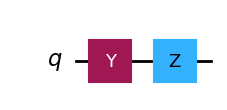

In [17]:
# Circuito con varias puertas simples
qc = QuantumCircuit(1)
qc.y(0)
qc.z(0)

qc.draw('mpl')

In [18]:
from qiskit.quantum_info import Operator
# Obtenemos la matriz unitaria equivalente
unitary = Operator(qc)
unitary.draw('latex', prefix="ZY = ")

<IPython.core.display.Latex object>

Debido a que el producto de matrices no es conmutativo, al obtener la matriz equivalente, tenemos que tener en cuenta que el orden en el que se aplican las puertas:

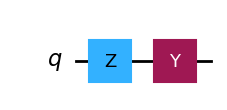

<IPython.core.display.Latex object>

In [19]:
# Circuito con dos puertas y obtenemos la matriz unitaria equivalente
qc = QuantumCircuit(1)
qc.z(0)
qc.y(0)
display(qc.draw('mpl'))
unitary = Operator(qc)
unitary.draw('latex', prefix="YZ = ")

### Puerta _phase shift_

Puertas que cambian la fase relativa:

$$
P_\theta  = \begin{bmatrix}1 & 0 \\ 0 & e^{i\theta} \end{bmatrix}
$$

La inversa de $P_\theta$ es su conjugada traspuesta:
$$
P_\theta^\dagger = \begin{bmatrix}1 & 0 \\ 0 & e^{-i\theta} \end{bmatrix}
$$



---


**Ejemplo:**

$$
P_\theta|+\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 0 \\ 0 & e^{i\theta} \end{bmatrix}\begin{bmatrix}1 \\ 1\end{bmatrix} = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ e^{i\theta}\end{bmatrix} = \tfrac{1}{\sqrt{2}}(|0\rangle + e^{i\theta}|1\rangle)
$$



---


Casos particulares:

$$
Z = P_\pi = \begin{bmatrix}1 & 0 \\ 0 & e^{i\pi} \end{bmatrix} = \begin{bmatrix}1 & 0 \\ 0 & -1 \end{bmatrix}
$$

$$
S = P_{\pi/2} = \begin{bmatrix}1 & 0 \\ 0 & e^{i\pi/2} \end{bmatrix} = \begin{bmatrix}1 & 0 \\ 0 & i \end{bmatrix} = \sqrt{Z}
$$

$$
T = P_{\pi/4} = \begin{bmatrix}1 & 0 \\ 0 & e^{i\pi/4} \end{bmatrix} = \sqrt{S}
$$


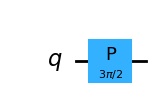

<IPython.core.display.Latex object>

In [20]:
# Ejemplo: puerta fase  3𝜋/2
import numpy as np
qc = QuantumCircuit(1)
theta = 3*np.pi/2
qc.p(theta, 0)
display(qc.draw('mpl'))

unitary = Operator(qc)
unitary.draw('latex', prefix="P_{3\\pi/2} = ")

### Puerta Hadamard

$$
H = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix}
$$

Esta puerta permite transformar un estado simple ($|0\rangle$ o $|1\rangle$) en un estado en superposición.


---


**Ejemplos**

$$
H|0\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix}1 \\ 0 \end{bmatrix} =  \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ 1 \end{bmatrix} = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle) =  |+\rangle
$$

$$
H|1\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix}0 \\ 1 \end{bmatrix} =  \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ -1 \end{bmatrix} = \tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle) =  |-\rangle
$$


---

## 💻 Ejercicio: Puerta H

Crea un circuito de 1 cúbit. Usa una puerta para poner el cúbit en el estado |1\rangle, aplícale una puerta $H$ y muestra el vector de estado de salida.

In [ ]:
# Crea un circuito de 1 cúbit
qc = ....

# Aplica la puerta para obtener el estado |1>
qc....

# Aplica la puerta H
qc....

# Muestra el circuito y el estado final





---



<a name="bloch"></a>
### Puertas como rotaciones en la esfera de Bloch

Las puertas pueden verse como una rotación del cúbit en la esfera de Bloch:

- $X$, $Y$, $Z$: rota un ángulo $\pi$ alrededor del eje X, Y o Z, respectivamente
- $R_\theta$ o $R_z(\theta)$: rota un ángulo $\theta$ alrededor del eje Z
- $S$: rota $\tfrac{\pi}{2}$ alrededor del eje Z
- $T$: rota $\tfrac{\pi}{4}$ alrededor del eje Z
- $H$:  combinación de dos rotaciones: primero $\pi$ alrededor de Z seguida de $\pi/2$ alrededor de y

En general, existen infinitas puertas. Las más usadas son rotaciones alrededor de Z, simplemente por usar como base estándar $\{|0\rangle,|1\rangle\}$, pero también existen $R_x(\phi)$ y $R_y(\phi)$. Estas rotaciones se pueden expresar como exponenciales de las matrices de Pauli:

$$
R_x(\theta) = e^{-i\theta \sigma_x/2} = \cos\frac{\theta}{2}I-i\sin\frac{\theta}{2}\sigma_x =
\begin{bmatrix}
\cos\frac{\theta}{2}   & -i\sin\frac{\theta}{2}\\
-i\sin\frac{\theta}{2} & \cos\frac{\theta}{2}
\end{bmatrix}
$$

$$
R_y(\theta) = e^{-i\theta \sigma_y/2} = \cos\frac{\theta}{2}I-i\sin\frac{\theta}{2}\sigma_y =
\begin{bmatrix}
\cos\frac{\theta}{2}   & -\sin\frac{\theta}{2}\\
\sin\frac{\theta}{2} & \cos\frac{\theta}{2}
\end{bmatrix}
$$

$$
\begin{aligned}
R_z(\theta) & = e^{-i\theta \sigma_z/2} = \cos\frac{\theta}{2}I-i\sin\frac{\theta}{2}\sigma_z =
\begin{bmatrix}
e^{-i\frac{\theta}{2}}   & 0\\
0 & e^{i\frac{\theta}{2}}
\end{bmatrix} \\
&=
e^{-i\frac{\theta}{2}} \begin{bmatrix}
1   & 0\\
0 & e^{i\theta}
\end{bmatrix}= e^{-i\frac{\theta}{2}}P_\theta
\end{aligned}
$$

Así, la puerta $H$ puede escribirse como:
$$
\begin{aligned}
H &= R_y(\tfrac{\pi}{2})R_z(\pi) =
\begin{bmatrix}
\cos\frac{\pi}{4}   & -\sin\frac{\pi}{4}\\
\sin\frac{\pi}{4} & \cos\frac{\pi}{4}
\end{bmatrix}
\begin{bmatrix}
1   & 0\\
0 & e^{i\pi}
\end{bmatrix} \\[10pt] &=
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1   & -1\\
1 & 1
\end{bmatrix}
\begin{bmatrix}
1   & 0\\
0 & -1
\end{bmatrix} =
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1   & 1\\
1 & -1
\end{bmatrix}
\end{aligned}
$$

**Ejemplo**: En https://javafxpert.github.io/grok-bloch/ puede verse como modifica un vector de estado la aplicación de las puertas.


---

## 💻 Ejercicio: Puerta $R_y(\theta)$



Aplica una puerta $R_y(\theta)$ a un cúbit en estado $|0\rangle$ para obtener un estado con un 30% de probabilidad de medir 0 y un 70% de medir 1
- Recuerda que podemos escribir el estado como $|\psi\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle$


𝜃 = 1.9823131728623848


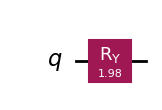

<IPython.core.display.Latex object>

In [23]:
from math import sqrt,acos

prob = [0.3, 0.7]

qc = QuantumCircuit(1)

# Calcula el valor de 𝜃
theta = 2*acos(sqrt(prob[0])) # @param {type:"raw"}
print(f"𝜃 = {theta}")

# Muestra el circuito y el vector de estado final
qc.ry(theta, 0)
display(qc.draw('mpl'))

e = Statevector.from_circuit(qc)
e.draw('latex', prefix="RY(𝜃)|0\\rangle = ")




---



<a name="puertas1c"></a>
### Puertas de 1 cúbit en un sistema multicúbit

Igual que en el caso de puertas clásicas, las puertas en paralelo (que actúan sobre dos cúbits diferentes) se combinan usando el producto tensor.

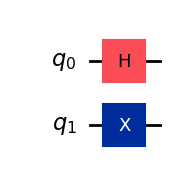

<IPython.core.display.Latex object>

In [24]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw('mpl'))
u = Operator(qc)
u.draw('latex', prefix="X\\otimes H = ")

El efecto conjunto de ambas puertas puede obtenerse mediante el producto tensor de sus matrices (en el caso de Qiskit el orden es del cúbit más al menos significativo):

$$
X|q_1\rangle \otimes H|q_0\rangle = (X\otimes H)|q_1 q_0\rangle
$$

Ese producto tensor es:

$$
\begin{aligned}
X\otimes H &= \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
                \\
                1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\end{bmatrix} \\
&= \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 & 0 & 1 & 1 \\
                0 & 0 & 1 & -1 \\
                1 & 1 & 0 & 0 \\
                1 & -1 & 0 & 0 \\
\end{bmatrix}
\end{aligned}
$$

que se multiplica por el vector de dimensión 4 $|q_1 q_0\rangle$.

La matriz anterior se puede escribir como:

$$
X\otimes H =
\begin{bmatrix} 0 & H \\
               H & 0\\
\end{bmatrix}
$$


Si solo tenemos una puerta actuando sobre un cúbit, se considera que sobre la otra actúa la puerta $I$\\

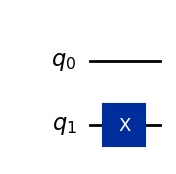

<IPython.core.display.Latex object>

In [25]:
qc = QuantumCircuit(2)
qc.x(1)
display(qc.draw('mpl'))
u = Operator(qc)
u.draw('latex', prefix="X\\otimes I = ")

En este ejemplo, las puertas aplicadas son:
$$
X|q_1\rangle \otimes I|q_0\rangle = (X\otimes I)|q_1 q_0\rangle
$$

Otro ejemplo más complejo:

<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-1357537541.py:8: SyntaxWarning: invalid escape sequence '\o'
  latex_output = u.draw('latex', prefix="(H\otimes I)\cdot(X\otimes H) = HX\otimes IH = ")


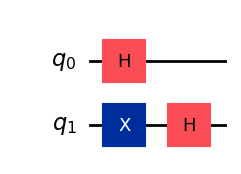

<IPython.core.display.Latex object>

$$
(H\otimes I)\cdot(X\otimes H) = HX\otimes IH = 
\begin{bmatrix}
\frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2}  \\
 \frac{1}{2} & - \frac{1}{2} & \frac{1}{2} & - \frac{1}{2}  \\
 - \frac{1}{2} & - \frac{1}{2} & \frac{1}{2} & \frac{1}{2}  \\
 - \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & - \frac{1}{2}  \\
 \end{bmatrix}
$$


In [28]:
# 2 cúbits y 3 puertas
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw('mpl'))
u = Operator(qc)
latex_output = u.draw('latex', prefix="(H\otimes I)\cdot(X\otimes H) = HX\otimes IH = ")
display(latex_output)
print(latex_output._repr_latex_())

<a name="controladas"></a>
## Puertas controladas

Las puertas controladas afectan a varios cúbits. Realizan una operación sobre determinados cúbits (cúbits _target_) en función del valor de otros (cúbits _control_).

La más importante es la **puerta CNOT** o **X controlada**.

Puerta CNOT: Actúa sobre 2 cúbits
  - Realiza un NOT (puerta X) en el cúbit objetivo (_target_) si el estado del cúbit de control es $|1\rangle$. La puerta se representa en un circuito como la del siguiente ejemplo, con `q0` como control y `q1` como target.

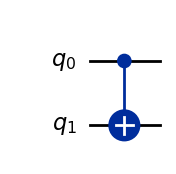

<IPython.core.display.Latex object>

$$
CNOT = 
\begin{bmatrix}
1 & 0 & 0 & 0  \\
 0 & 0 & 0 & 1  \\
 0 & 0 & 1 & 0  \\
 0 & 1 & 0 & 0  \\
 \end{bmatrix}
$$


In [31]:
qc = QuantumCircuit(2)
# Aplica CNOT, primer parámetro control, segundo target
qc.cx(0,1)
display(qc.draw('mpl'))
u = Operator(qc)
latex_output= u.draw('latex', prefix="CNOT = ")

display(latex_output)
print(latex_output._repr_latex_())

Esta matriz intercambia las amplitudes de los estados $|01\rangle$ y $|11\rangle$ del vector de estado (aquellos en las que el cúbit de control `q0` es 1):

$$
|\psi\rangle = \begin{bmatrix} a_{0} \\ a_{1} \\ a_{2} \\ a_{3} \end{bmatrix}, \quad \text{CNOT}|\psi\rangle = \begin{bmatrix} a_{0} \\ a_{3} \\ a_{2} \\ a_{1} \end{bmatrix} \begin{matrix} \\ \leftarrow \\ \\ \leftarrow \end{matrix}
$$

In [32]:
from qiskit.quantum_info import random_statevector
# Probamos con un estado inicial aleatorio
e0 = random_statevector(dims=4, seed=13) # dims: dimensión del estado = 2^numero_cubits
e1 = e0.evolve(qc)

display(e0.draw('latex'))
e1.draw('latex')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Otras puertas controladas

La puerta CNOT se llama también _controlled-X_. Esa misma idea se puede aplicar a cualquier otra puerta $U$. La matrix de una operación controlled-U es, suponiendo $q_0$ el cúbit más significativo:

$$
\begin{aligned}
\text{U} & =
\begin{bmatrix}
u_{00} & u_{01} \\
u_{10} & u_{11}\\
\end{bmatrix} \\
\quad & \\
\text{Controlled-U} & =
\begin{bmatrix}
I & 0 \\
0 & U\\
\end{bmatrix}
 =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}\\
\end{bmatrix}
\end{aligned}
$$

O suponiendo $q_0$ el cúbit menos significativo (orden usado en Qiskit)

$$
\text{Controlled-U} =  
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & u_{00} & 0 & u_{01} \\
0 & 0 & 1 & 0 \\
0 & u_{10} & 0 & u_{11}\\
\end{bmatrix}
$$

**Ejemplo**: Puerta Y controlada

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
c = 0
t = 1
qc = QuantumCircuit(2)
qc.cy(c, t)
display(qc.draw('mpl'))
u = Operator(qc)
u.draw('latex', prefix="CY = ")

**Ejemplo**: Puerta H controlada


In [ ]:
c = 0
t = 1
qc = QuantumCircuit(2)
qc.ch(c, t)
display(qc.draw('mpl'))
u = Operator(qc)
u.draw('latex', prefix="CY = ")

<a name="kick"></a>
### Phase-kickback

Un efecto interesante se ve cuando se usan rotaciones controladas.

Por ejemplo, si aplicamos una puerta $P_\theta$ a un cúbit en estado simple ($|0\rangle$ o $|1\rangle$), no produce ningún efecto:

$$
P_\theta|0\rangle =
\begin{bmatrix}1 & 0 \\ 0 & e^{i\theta} \end{bmatrix}
\begin{bmatrix}1 \\ 0\end{bmatrix} =
\begin{bmatrix}1 \\ 0\end{bmatrix}
= |0\rangle
$$

$$
P_\theta|1\rangle =
\begin{bmatrix}1 & 0 \\ 0 & e^{i\theta} \end{bmatrix}
\begin{bmatrix}0 \\ 1\end{bmatrix} =
\begin{bmatrix}0 \\ e^{i\theta}\end{bmatrix}
= e^{i\theta}|1\rangle = |1\rangle
$$

En el segundo caso, $e^{i\theta}$ es una _fase global_, que no es observable.

Pero si aplicamos una $P_\theta$ controlada por un cúbit en estado $|{+}\rangle$ teniendo como target un cúbit en estado $|1\rangle$ se produce un cambio de _fase relativa_ en el cúbit de control.

Así, si $q_0=|+\rangle$ y $q_1=|1\rangle$,  y aplicamos una $CP_\theta$ al estado $|1{+}\rangle$ tenemos:

$$
\begin{aligned}
|1{+}\rangle & = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
& = \tfrac{1}{\sqrt{2}}(|10\rangle + |11\rangle) \\
& \\
CP_θ|1{+}\rangle & = \tfrac{1}{\sqrt{2}}(CP_\theta|10\rangle + CP_\theta|11\rangle) \\
& = \tfrac{1}{\sqrt{2}}(|10\rangle + CP_\theta|1\rangle\otimes |1\rangle) \\
& = \tfrac{1}{\sqrt{2}}(|10\rangle + e^{i\theta}|11\rangle) \\
& = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + e^{i\theta}|1\rangle)
\end{aligned}
$$

Es decir, el cúbit target se queda como está mientras que el cúbit de control rota $\theta$ en torno al eje Z.  Este efecto se conoce como _phase-kickback_

In [ ]:
import numpy as np
# Cúbit de control
c = 0
# Cúbit target
t = 1
# Fase
𝜃 = np.pi/4
qc=QuantumCircuit(2)
qc.h(c)
qc.x(t)
qc.cp(𝜃, c, t)
display(qc.draw('mpl'))
estado = Statevector.from_circuit(qc)
estado.draw('bloch')

El efecto es idéntico si se intercambian los bits de control y target

In [ ]:
qc=QuantumCircuit(2)
qc.h(c)
qc.x(t)
# Intercambiamos c y t
qc.cp(𝜃, t, c)
display(qc.draw('mpl'))
estado = Statevector.from_circuit(qc)
estado.draw('bloch')

### Otras puertas multicúbit

#### Puerta swap

Intercambia dos cúbits

In [ ]:
qc = QuantumCircuit(2)
qc.x(1)
qc.swap(0,1)
display(qc.draw('mpl'))
Statevector.from_circuit(qc).draw('latex', prefix="\\text{SWAP}|10\\rangle = \n")

#### Puerta _Walsh-Hadamard_

El uso de puertas `H` permite poner $n$-cúbits en un estado de superposición.

El estado de _superposición completa_ es:

$$
|+\rangle^{\otimes n} = H^{\otimes n}|0\rangle^{\otimes n}
$$

$H^{\otimes n}$ se conoce como puerta _Walsh-Hadamard_.

Ejemplo para 4 cúbits en estado $|0\rangle$:
$$
H^{\otimes 4}|0000\rangle = H|0\rangle\otimes H|0\rangle\otimes H|0\rangle\otimes H|0\rangle = \\
\frac{1}{4}\left[(|0\rangle + |1\rangle)\otimes (|0\rangle + |1\rangle) \otimes (|0\rangle + |1\rangle) \otimes (|0\rangle + |1\rangle)\right] = \frac{1}{4}\left[\\
|0000\rangle+|0001\rangle+|0010\rangle+|0011\rangle+\\
|0100\rangle+|0101\rangle+|0110\rangle+|0111\rangle+\\
|1000\rangle+|1001\rangle+|1010\rangle+|1011\rangle+\\
|1100\rangle+|1101\rangle+|1110\rangle+|1111\rangle\phantom{-}\right] \\
= |+\rangle^{\otimes 4}
$$

Si alguno de los cúbits está en estado $|1\rangle$ aparecen signos negativos:
$$
H^{\otimes 4}|1010\rangle = H|1\rangle\otimes H|0\rangle\otimes H|1\rangle\otimes H|0\rangle = \\
\frac{1}{4}\left[(|0\rangle - |1\rangle)\otimes (|0\rangle + |1\rangle) \otimes (|0\rangle - |1\rangle) \otimes (|0\rangle + |1\rangle)\right] = \frac{1}{4}\left[\\
|0000\rangle+|0001\rangle-|0010\rangle-|0011\rangle+\\
|0100\rangle+|0101\rangle-|0110\rangle-|0111\rangle-\\
|1000\rangle-|1001\rangle+|1010\rangle+|1011\rangle-\\
|1100\rangle-|1101\rangle+|1110\rangle+|1111\rangle\phantom{-}\right]
$$

En este ejemplo, el signo negativo aparece en los estados $|i_3i_2i_1i_0\rangle$ para los que se verifica que:
    
$$
(i_3i_2i_1i_0)\cdot(1010) = i_3\cdot 1\oplus i_2\cdot 0 \oplus i_1\cdot 1 \oplus i_0\cdot 0 = i_3\oplus i_1 = 1
$$

que son los estados para los que $i_3 \ne i_1$.
    
En general, para un estado $|x\rangle = |x_{n-1}x_{n-2}\ldots x_0\rangle$ de n-cúbits, se puede escribir:

$$
H^{\otimes n}|x\rangle = \frac{1}{\sqrt{2^n}} \sum_{i=0}^{2^n-1} (-1)^{x\cdot i}|i\rangle
$$

siendo $x\cdot i = x_{n-1}i_{n-1}\oplus x_{n-2}i_{n-2}\oplus \ldots \oplus x_0i_0$.

Esta expresión es la _transformada de Walsh-Hadamard_ sobre el espacio de estados.


#### Puerta Toffoli (Controlled-Controlled-NOT o CCX)

La puerta Toffoli es una puerta de tres qubits con dos controles y un target. Realiza una X en el target sólo si ambos controles están en el estado $|1\rangle$. Permite implementar operaciones lógicas sobre los cúbits de control.

In [ ]:
# Implementación de una AND
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Ponemos los cúbits de control en superposición
qc.h(a)
qc.h(b)
# Toffoli con bits de control a y b y target t
qc.ccx(a,b,t)
display(qc.draw('mpl'))
# Estado de salida
Statevector.from_circuit(qc).draw('latex', prefix="a \\land b = \n")

In [ ]:
# Implementación de una NAND
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Ponemos los cúbits de control en superposición
qc.h(a)
qc.h(b)

# Toffoli con bits de control a y b y target t
qc.ccx(a,b,t)

# Invertimos la ancilla
qc.x(t)

display(qc.draw('mpl'))
# Estado de salida
Statevector.from_circuit(qc).draw('latex', prefix="\\neg(a \\land b) = \n")

Para implementar una OR, podemos hacer uso de la transformación $a\lor b = \neg(\neg a \land \neg b)$

In [ ]:
# Implementación de una OR
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Ponemos los cúbits de control en superposición
qc.h(a)
qc.h(b)
# Negamos ambos controles
qc.x(a)
qc.x(b)
# Toffoli con bits de control a y b y target t
qc.ccx(a,b,t)
# Negamos la ancilla
qc.x(t)
# Negamos ambos controles (uncomputing)
qc.x(a)
qc.x(b)
display(qc.draw('mpl'))

# Estado de salida
Statevector.from_circuit(qc).draw('latex', prefix="a \\lor b = \n")

#### Puertas controladas genéricas<a id="genericas"></a>

En general, se puede pensar en puertas $U$ que actúan sobre $k$ cúbits y que son controladas por $n$ cúbits:

<center><img src="https://drive.google.com/uc?export=view&id=1N0OgtidrJdounWS0ybEkgWwHo_CVIw32" alt="Puerta controlada genérica" width="300"  /></center>

In [ ]:
# Ejemplo: puerta MCMTGate en Qiskit
from qiskit.circuit.library import MCMTGate, XGate
n = 5
qc = QuantumCircuit(n)
qc = qc.compose(MCMTGate(XGate(),n-2,2))
qc.draw('mpl')



---



---



<a name="e2"></a>
# **✍️ Ejercicio entregable 2: Función lógica**

El siguiente código muestra como podemos crear una _puerta AND_ de n cúbits y como se usa en un circuito


In [ ]:
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.circuit.library import MCMTGate, XGate
from qiskit.circuit.gate import Gate

def AndGate(n_controles: int) -> Gate:
  # Añadimos 1 cubit de salida
  qc_and = QuantumCircuit(n_controles + 1)
  # Puerta MCMT
  qc_and.append(MCMTGate(XGate(), n_controles, 1), range(n_controles + 1))
  # Devolvemos el circuito convertido en un objeto Gate
  return qc_and.to_gate(label='AND')

# Circuito de prueba
controles = QuantumRegister(3, name="a")
ancilla = QuantumRegister(1, name='t')

# Creamos el circuito
qc = QuantumCircuit(controles, ancilla)

# Creamos la puerta
gate = AndGate(len(controles))

# Añadimos la puerta al circuito
# Append añade instrucciones al circuito
# Hay que especificae una con los cúbits a los que se añaden las instrucciones
qc.append(gate, controles[:]+ancilla[:])

display(qc.draw('mpl'))
display(qc.decompose().draw('mpl'))

Implementa una función similar para una puerta OR. Úsalas para obtener el valor de la siguiente función lógica para todos los valores de  bits:

$$
f(a_0,a_1,a_2,a_3,a_4)=(¬a_0∧¬a_1∧¬a_2)∨(a_1∧¬a_3∧a_4)∨(a_0∧a_2∧¬a_4)
$$

El siguiente código muestra los valores para comprobar el resultado.

In [ ]:
# Lo hacemos en clásica
import itertools

def evaluar_logica():

    # Generamos todas las combinaciones posibles de 0 y 1 para 5 variables (2^5 = 32)
    combinaciones = list(itertools.product([0, 1], repeat=5))
    ceros = list()
    unos = list()

    for a4, a3, a2, a1, a0 in combinaciones:
        # Definimos los términos de la función:
        # Término 1: (¬a0 ∧ ¬a1 ∧ ¬a2)
        t1 = (not a0) and (not a1) and (not a2)

        # Término 2: (a1 ∧ ¬a3 ∧ a4)
        t2 = a1 and (not a3) and a4

        # Término 3: (a0 ∧ a2 ∧ ¬a4)
        t3 = a0 and a2 and not a4

        # Función completa: T1 v T2 v T3
        resultado = int(t1 or t2 or t3)

        if resultado == 0:
            ceros.append((a4,a3,a2,a1,a0))
        else:
            unos.append((a4,a3,a2,a1,a0))

    print("Salidas con 0")
    # Encabezado de la tabla
    print(f"{'a4':<3} {'a3':<3} {'a2':<3} {'a1':<3} {'a0':<3} | {'Resultado':<10}")
    print("-" * 35)
    for s in ceros:
        print(f"{s[0]:<3} {s[1]:<3} {s[2]:<3} {s[3]:<3} {s[4]:<3} | {0:<10}")

    print("\nSalidas con 1")
    # Encabezado de la tabla
    print(f"{'a4':<3} {'a3':<3} {'a2':<3} {'a1':<3} {'a0':<3} | {'Resultado':<10}")
    print("-" * 35)
    for s in unos:
        print(f"{s[0]:<3} {s[1]:<3} {s[2]:<3} {s[3]:<3} {s[4]:<3} | {1:<10}")

# Ejecutar la función
evaluar_logica()



---



---



---



<a name="entangled"></a>
# **Estados entrelazados (_entangled_)**

Estados especiales con propiedades muy interesantes:

- No se pueden expresar como el producto tensor de dos estados de dimensión inferior
- La medida de uno de los cúbits determina de forma inmediata el valor del segundo, aunque los cúbits estén separados por cualquier distancia:
  - [‘Spooky action at a distance’](https://en.wikipedia.org/wiki/Quantum_nonlocality)
  

**Ejemplo**

$$
|\beta_0\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

Este es uno de los denominados [estados de Bell](https://en.wikipedia.org/wiki/Bell_state).



Se puede crear este estado $|\beta_0\rangle$ mediante una CNOT que use como control un cúbit en estado $|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ y como target un cúbit en estado $|0\rangle$:


In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)

# CNOT: primer parámetro: control, segundo: target
qc.cx(0,1)
display(qc.draw('mpl'))

𝛽0 = Statevector.from_circuit(qc)
𝛽0.draw('latex', prefix="|\\beta_0\\rangle = \\text{CNOT}|0+\\rangle = ")

Al no poder descomponer un estado entrelazado en el producto tensor de dos estados individuales, no es posible representarlos en una esfera de Bloch para cada cúbit.

In [ ]:
𝛽0.draw('bloch')

## Estados de Bell

Son los siguientes estados entrelazados:

$$
|\beta_{00}\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}
$$
$$
|\beta_{01}\rangle = \frac{|01\rangle + |10\rangle}{\sqrt{2}}
$$
$$
|\beta_{10}\rangle = \frac{|00\rangle - |11\rangle}{\sqrt{2}}
$$
$$
|\beta_{11}\rangle = \frac{|01\rangle - |10\rangle}{\sqrt{2}}
$$

Esos estados forman una base del espacio de Hilbert de 2 cúbits.

El estado $|\beta_{00}\rangle$ se obtiene con el circuito anterior.

Para conseguir los estados restantes, se puede utilizar la siguiente expresión general:

$$
|\beta_{ij}\rangle = (I\otimes Z^iX^j)|\beta_{00}\rangle
$$



---



---



<a name="e3"></a>
# **✍️ Ejercicio entregable 3: Creación de estados de Bell**

Obtén circuitos para los tres estados de Bell restantes.



---



---



### Estados entrelazados de más cúbits

Los estados entrelazados de más de 2 cúbits se denominan [estados _GHZ_](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state)

Uno de estos estados para 3 cúbits es:

$$
|GHZ\rangle = \frac{|000\rangle+|111\rangle}{\sqrt{2}}
$$

y se puede obtener con el siguiente circuito:

In [ ]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
display(qc.draw('mpl'))

ghz_state = Statevector.from_circuit(qc)
ghz_state.draw('latex', prefix="|GHZ\\rangle = ")



---

## 💻 Ejercicio: GHZ generalizado

Generaliza el circuito anterior para generar un GHZ de $n$ cúbits. Crea una función que reciba $n$ y devuelva un QuantumCircuit.



---



---



---



<a name="medida"></a>
# **Medida del estado**
Al medir el sistema $|\psi\rangle=\sum_{i=0}^{n-1} a_i |i\rangle$, la probabilidad de obtener el valor $i$, con $i=0,\ldots,n-1$, viene dada por la *Regla de Born*:

$$p(i) = |\langle i|\psi\rangle|^2 =  \langle\psi|i\rangle\langle i|\psi\rangle = \langle\psi|P_i|\psi\rangle = |a_i|^2$$

donde $P_i = |i\rangle\langle i|$ es una matriz que se denomina *operador de proyección*, pues proyecta el vector de estado sobre el subespacio generado por el estado base $|i\rangle$.

El proceso de medida hace que el estado _colapse_, y el estado después de la medida es $|i\rangle$.

Lo que hacemos al medir es obtener la proyección del estado sobre el vector $|i\rangle$ de la base canónica.



Para 1 cúbit, la medida sobre la base canónica $\{|0\rangle, |1\rangle\}$ se denomina _medida Z_ porque equivale a proyectar el vector de estado sobre el eje Z de la esfera de Bloch. Es la medida más habitual (por no decir, la única), pero, en teoría, se podría medir un estado sobre cualquier base. Así tendríamos la _medida X_ usando la base $\{|+\rangle, |-\rangle\}$ y la _medida Y_ usando la base $\{|\!\!+i\rangle, |\!\!-i\rangle\}$.

----------------------------

**Ejemplo**

Dado el estado de 2 cúbits $|\psi\rangle=a_0|00\rangle+a_1|01\rangle+a_2|10\rangle+a_3|11\rangle = \frac{1}{11}(2|00\rangle+|01\rangle+4|10\rangle+10|11\rangle)$, la posibilidad de obtener 10 al medir es:

$$
p(2) = \langle\psi|10\rangle\langle 10|\psi\rangle = a_2^*a_2 = |a_2|^2 = \frac{16}{121}
$$

y el estado después de la medida es $|10\rangle$.

----------------------------

#### Medida de cúbits individuales en un sistema multi-cúbit
Si medimos cúbits individuales, la probabilidad se obtiene de forma similar. Por ejemplo, la probabilidad de obtener, en el estado del ejemplo anterior, un 1 cuando medimos el cúbit menos significativo es:

$$
p_{q0}(1) = p(1) + p(3) = |\langle 01|\psi\rangle|^2 + |\langle 11|\psi\rangle|^2 = |a_1|^2+|a_3|^2 = \frac{1}{121}+\frac{100}{121} = \frac{101}{121}
$$

Y el estado despues de la medida es:

$$
|\psi'\rangle = \frac{a_1|01\rangle + a_3|11\rangle}{\sqrt{|a_1|^2+|a_3|^2}} = \frac{\frac{1}{11}|01\rangle + \frac{10}{11}|11\rangle}{\sqrt{\frac{101}{121}}} = \frac{1}{\sqrt{101}}(|01\rangle + 10|11\rangle)
$$


#### Medida en Qiskit

En Qiskit, la primitiva _Sampler_ es una interfaz de alto nivel que ejecuta uno o varios circuitos cuántico y devuelve muestras de los resultados de medida.

  - Permite obtener resultados de forma eficiente tanto en simuladores como en hardware cuántico real.

Creamos un circuito cuántico con 2 cúbits en el estado $\frac{1}{11}(2|00\rangle+|01\rangle+4|10\rangle+10|11\rangle)$ y lo simulamos primero con el Sampler básico de Qiskit.

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit.visualization import plot_histogram
from math import sqrt

# Definimos el vector de estado inicial 1/11(2|00⟩+|01⟩+4|10⟩+10|11⟩)
svector = Statevector([2/11, 1/11, 4/11, 10/11])

# Definimos 2 cúbis y 2 bits clásicos para recoger las medidoas
qr = QuantumRegister(2, 'qbit')
cr = ClassicalRegister(2, 'medidas')

# Creamos el circuito cuántico
qc = QuantumCircuit(qr,cr)

# Inicializamos el sistema al estado inicial
qc.initialize(svector)

 # Le añadimos la medida
qc.measure(qr,cr)
qc.draw('mpl')

In [ ]:
sampler_simple = Sampler()

# Lanzamos el trabajo
# Le pasamos una lista de circuitos
shots = 10000
job = sampler_simple.run([qc], shots=shots)

# Resultado del trabajo para el primer (y único) circuito
result = job.result()[0]

# Miramos las medidas en el registro medidas
# counts es un diccionario con el núnero de veces que se ha medido cada estado
counts = result.data.medidas.get_counts()

# Obtenemos las probabilidades
final_distribution = {key: val / shots for key, val in counts.items()}

# Mostramos el histograma
plot_histogram(final_distribution)

Las probabilidades deberían ser:
$$p(0) = \left|\frac{2}{11}\right|^2 = \frac{4}{121} = 0.033\\
p(1) = \left|\frac{1}{11}\right|^2 = \frac{1}{121} = 0.0082\\
p(2) = \left|\frac{4}{11}\right|^2 = \frac{16}{121} = 0.132\\
p(3) = \left|\frac{10}{11}\right|^2 = \frac{100}{121} = 0.826$$


Lo simulamos ahora con el [simulador Aer](https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.AerSimulator.html), que permite diferentes métodos de simulación así como incorporar modelos de ruido.

In [ ]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as Sampler
from qiskit import transpile


# Utilizamos el AerSimulator en modo automático
sim = AerSimulator(method='automatic')

sampler = Sampler.from_backend(sim)

# Hacemos una simulación y obtenemos los resultados
result = sampler.run([transpile(qc,sim)], shots=shots).result()[0]

# Miramos las medidas en el registro clasico
# counts es un diccionario con el núnero de veces que se ha medido cada estado
counts = result.data.medidas.get_counts()

# Obtenemos las probabilidades
final_distribution = {key: val / shots for key, val in counts.items()}

# Mostramos el hitograma
plot_histogram(final_distribution)

Probamos ahora a medir solo el cúbit 0

In [ ]:
# Repetimos para medir solo el cúbit 0
# Definimos 2 cúbis y 2 bits clásicos para recoger las medidoas
qr = QuantumRegister(2, 'qbit')
cr = ClassicalRegister(1, 'medidas')

# Creamos el circuito cuántico
qc = QuantumCircuit(qr,cr)

# Inicializamos el sistema al estado 1/11(2|00⟩+|01⟩+4|10⟩+10|11⟩)
qc.initialize(svector)

 # Le añadimos la medida
qc.measure(qr[0],cr)

qc.draw('mpl')

In [ ]:
# Hacemos una simulación y obtenemos los resultados
run = sampler_simple.run([qc], shots=shots)

result = run.result()[0]

# Miramos las medidas en el registro clasico
# counts es un diccionario con el núnero de veces que se ha medido cada estado
counts = result.data.medidas.get_counts()

# Obtenemos las probabilidades
final_distribution = {key: val / shots for key, val in counts.items()}

# Mostramos el histograma
plot_histogram(final_distribution)

Las probabilidades deberían ser:
$$p_{q0}(0) = \left|\frac{2}{11}\right|^2 + \left|\frac{4}{11}\right|^2  = \frac{20}{121} = 0.165\\
p_{q0}(1) = \left|\frac{1}{11}\right|^2 + \left|\frac{10}{11}\right|^2 = \frac{101}{121} = 0.835$$


El estado después de la medida se puede obtener de forma ideal así:

In [ ]:
salida, post_estado = svector.measure([0])  # medimos q0

print(f"Para la salida {salida} el estado posterior es:")
post_estado.draw('latex')

<a name="observables"></a>
## Observables y valor esperado

Un _observable_ representa cualquier cantidad que se pueda medir en estado cuántico (energía, posición, momento, etc.). A cada observable le corresponde un operador hermitiano $M$ en el espacio de estados del sistema bajo observación.

Como el operador $M$ es hermitiano $\rightarrow$ es diagonalizable $\rightarrow$ según el teorema de descomposición espectral $M$ se puede escribir como:

$$M = \sum_i \lambda_i P_i = \sum_i \lambda_i |u_i\rangle\langle u_i|$$

donde $|u_i\rangle$ son los autovectores (o autoestados) de $M$. Además, se verifica que los autovalores $\lambda_i$ son reales, $\lambda_i \in \mathbb{R}$.

**Medida general de un observable sobre un estado**

Cuando se mide un observable $M$ sobre un estado $|\psi\rangle$, las posibles salidas de la medida corresponden a los autovalores del observable $M$ y la probabilidad de obtener un resultado $\lambda_m$ se obtienen usando la Regla de Born:
    
$$
p(\lambda_m) = |\langle u_m|\psi\rangle|^2 = \langle\psi|u_m\rangle\langle u_m|\psi\rangle = \langle\psi|P_m|\psi\rangle
$$

y el estado posterior a la medida queda como:

$$
|\psi'\rangle = \frac{P_m|\psi\rangle}{\sqrt{p(m)}} = \frac{|u_m\rangle\langle u_m|\psi\rangle}{|\langle u_m|\psi\rangle|}
$$

En este caso, el operador de proyección $P_i = |u_i\rangle\langle u_i|$ proyecta el vector de estado sobre el subespacio generado por el autovector $|u_i\rangle$.

**Ejemplo**

Un ejemplo de observable es simplemente mirar si un cúbit $|\psi\rangle$ está o no en el estado $|1\rangle$. Ese observable tiene asociada la matriz:

$$
M =  \begin{bmatrix}0 & 0\\0 & 1\end{bmatrix} = \lambda_0|0\rangle\langle0| + \lambda_1|1\rangle\langle1| = |1\rangle\langle1|
$$

Los autovalores esta matriz son son $0$ y $1$ y los autovectores correspondientes son $|0\rangle$ y $|1\rangle$.

Dado un estado $|\psi\rangle = a_0|0\rangle + a_1|1\rangle$ la probabilidad de obtener el autovalor $1$ al medir ese observable es:

$$
p(1) = \langle\psi|P_1|\psi\rangle =  \langle\psi|1\rangle\langle 1|\psi\rangle
 = |a_1|^2
$$

y el estado posterior a la medida es:

$$
|\psi'\rangle = \frac{|1\rangle\langle 1|\psi\rangle}{|\langle 1|\psi\rangle|} = \frac{a_1}{|a_1|}|1\rangle \equiv |1\rangle
$$

### Valor esperado de un observable

El valor medio o valor esperado de un observable $M$ cuando observamos un estado genérico $|\psi\rangle$ es:

$$
\langle M\rangle_{|\psi\rangle} = \sum_i \lambda_i p(\lambda_i) = \sum_i \lambda_i\langle\psi|P_i|\psi\rangle = \langle\psi|\left(\sum_i \lambda_i P_i\right)|\psi\rangle = \langle\psi|M|\psi\rangle
$$

y la desviación estándar asociada a las observaciones de $M$:

$$[\Delta(M)]^2 = \langle(M-\langle M\rangle)^2\rangle = \langle M^2\rangle - \langle M\rangle^2$$

Notar que el valor esperado de $M$ en uno de sus autoestados $|u_i\rangle$ es, precisamente, el autovalor asociado a ese autoestado:

$$
\langle M\rangle_{|u_i\rangle} = \langle u_i|M|u_i\rangle = \langle u_i|\lambda_i|u_i\rangle = \lambda_i
$$

**Ejemplo**
    
Un observable para un estado de 1 cúbit es medir si el vector de estado se encuentra sobre uno de los ejes de la esfera de Bloch. Por ejemplo, si medimos si se encuentra sobre el eje $Z$ la matriz asociada al observable es la matriz de Pauli $\sigma_z$:

$$\sigma_z = \begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}$$

Los autovalores de $\sigma_z$ son $1$ y $-1$ y los autovectores correspondientes son $|0\rangle$ y $|1\rangle$.
    
Supongamos que tenemos el estado $|\psi\rangle=a_0|0\rangle+a_1|1\rangle$. El valor esperado del observable $\sigma_z$ en ese estado es:

$$\langle \sigma_z\rangle = \langle\psi|\sigma_z|\psi\rangle =
\begin{bmatrix}a_0^* & a_1^*\end{bmatrix}
\begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}
\begin{bmatrix}a_0 \\ a_1\end{bmatrix} = |a_0|^2-|a_1|^2
$$

Así, por ejemplo, si $|\psi\rangle=|0\rangle$ el valor esperado será:

$$\langle \sigma_z\rangle = \langle0|\sigma_z|0\rangle = 1$$

Si $|\psi\rangle=|1\rangle$ será:

$$\langle \sigma_z\rangle = \langle1|\sigma_z|1\rangle = -1$$

Y si $|\psi\rangle=|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ será:

$$\langle \sigma_z\rangle = \langle+|\sigma_z|+\rangle =0$$

Los observables correspondientes a medir sobre el eje $X$ y el $Y$ son las matrices de Pauli $\sigma_x$ y $\sigma_y$ respectivamente:

$$\sigma_x = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}$$

$$\sigma_y = \begin{bmatrix}0 & -i\\i & 0\end{bmatrix}$$

### Obtener valores esperados en Qiskit

Para obtener valores esperados de observables en Qiskit se puede hacer:

  - De forma teórica, si conocemos el vector de estado
  - A partir de un circuito que genera el estado, usando la primitiva _Estimator_.

Para usar Estimator hay que seguir los siguientes pasos:

- Se crea un objeto de la clase Estimator que se vaya a usar (que puede incluir parámetros).
- Se llama al método run con una lista de PUBS (Primitive Unified Blocs).

El PUB de un Estimator es una lista o tupla de dos a cuatro elementos:

- Un circuito cuántico que cree el estado que queremos observar.
- Uno o más observables (objetos de tipo Pauli, SparsePauliOp, string)
- Una colección de parámetros para el circuito (opcional)
- Opcionalmente, la precisión de la estimación (opcional)

Cada PUB (circuito, observables, valores de parámetros, precisión) de la lista que se pasa al método run, produce su propio resultado.
Así, se pueden ejecutar diferentes combinaciones con una sola llamada al método run().

**Ejemplo**: Obtener el valor esperado del observable $\sigma_z$ en el estado $|\psi\rangle = \tfrac{1}{\sqrt{3}}(|0\rangle + \sqrt{2}|1\rangle)$

1. Conociendo el vector de estado

In [ ]:
from qiskit.quantum_info import Statevector, SparsePauliOp
from math import sqrt

# Vector de estado
svector = Statevector([1/sqrt(3), sqrt(2)/sqrt(3)])

# Observable como SparsePauliOp
Z = SparsePauliOp("Z")

exp_value = svector.expectation_value(Z)

print(f"Valor esperado <Z> = {exp_value}")

# El valor esperado teórico es |a0|²-|a1|²
teo = 1/3 - 2/3
print(f"Valor esperado teórico = |a0|²-|a1|² = {teo}")

2. A partir de un circuito que crea el estado usando _Estimator_

In [ ]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorEstimator

# Creamos un circuito cuántico de 1 cúbit
qc = QuantumCircuit(1)

# Inicializamos el cúbit al estado 1/√3(|0⟩+√2|1⟩)
qc.initialize(svector)

# Estimador
estimator_simple = StatevectorEstimator()

# Definimos el PUB
pub = [(qc,Z)]

# Lanzamos el trabajo y vemos los resultados
job = estimator_simple.run(pub)
exp_value = job.result()[0].data.evs
print(f"Valor esperado <Z> = {exp_value}")


### Observable general

Un operador hermitiano $M$ asociado a un observable siempre puede expresarse como una combinación lineal de productos tensor de las matrices de Pauli $\{\mathbb{I}, \sigma_x, \sigma_y, \sigma_z\}$:

$$
M = \sum_i c_i P_i
$$

siendo $P_i$ un producto tensor de matrices de Pauli.

**Ejemplo**: Sea $M$ que actúa sobre 3 cúbits un observable de la forma:

$$
M = \frac{1}{2}\sigma_x\otimes I\otimes\sigma_x - 3 I\otimes \sigma_y\otimes\sigma_z + 2 \sigma_x\otimes \sigma_x\otimes\sigma_x
$$
Por tanto, se puede escribir:

$$
\langle M\rangle_{|\psi\rangle} = \langle\psi|M|\psi\rangle = \sum_i c_i \langle\psi|P_i|\psi\rangle =
\langle\psi|\left(\frac{1}{2}\sigma_x\otimes I\otimes\sigma_x - 3 I\otimes \sigma_y\otimes\sigma_z + 2 \sigma_x\otimes \sigma_x\otimes\sigma_x\right)|\psi\rangle = \\
\frac{1}{2}\langle\psi|\sigma_x\otimes I\otimes\sigma_x|\psi\rangle - 3\langle\psi|I\otimes \sigma_y\otimes\sigma_z|\psi\rangle +2\langle\psi| \sigma_x\otimes \sigma_x\otimes\sigma_x|\psi\rangle
 $$


---

## 💻 Ejercicio: Valor esperado de un observable

Obtén el valor esperado del observable anterior en el estado de superposición completa de 3 cúbits usando un _Estimator_.

  - Crea el circuito cuántico para generar el estado y usa el `StatevectorEstimator` de `qiskit.primitives`

In [ ]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorEstimator
from qiskit.quantum_info import SparsePauliOp

# Observable como SparsePauliOp
M = SparsePauliOp.from_list([("XIX", 0.5), ("IYZ", -3), ("XXX", 2)])

# TODO: Circuito que genera el estado


# TODO: Estimador

# TODO: Definimos el PUB


# TODO: Lanzamos el trabajo y vemos los resultados



<a name="errores"></a>
## Errores, matrices de densidad y estados mezcla

Diferentes fuentes de error producen fallos en la computación:

 - Errores en la preparación del estado y en la medida
 - Errores en las puertas
 - Errores en estadísticos debidos a un número finito de medidas
 - Errores debidos al ruido ambiental

Se necesitan técnicas de corrección de errores:

  - Para implementar 1 cúbit _lógico_ (sin error) se necesitan varios cúbits físicos

Los sistemas actuales, con pocos cúbits y con errores, se denominan NISQ (_Noisy intermediate-scale quantum_)

### Tiempos de decoherencia

El ruido puede hacer que con el tiempo el estado de un cúbit cambie

 - $T_1$ (tiempo de relajación): tiempo en que un estado $|1\rangle$ decae a $|0\rangle$
   - La probabilidad de que el cúbit siga a $|1\rangle$ tras un tiempo $t$ es $P(|1\rangle) = e^{-\frac{t}{T_1}}$
 - $T_2$ (tiempo de _dephasing_): tiempo en el que un estado $|+\rangle$ decae a un estado _mezcla_

Estos valores limitan el tiempo (y, por tanto, la complejidad) de un algoritmo en un computador cuántico

Los valores concretos dependen de la tecnología:

  - De decenas de $\mu s$ a milisegundos

### Ejecución con ruido en Qiskit

Qiskit permite simular el efecto del ruido en una ejecución, bien a través de Aer con modelos de ruido o bien usanfo un **Fake Provider**:

  - Un Fake Provider permite simular la ejecución de un código usando información de computador físico real
  - El resultado proporcionado se aproximaría al que saldría de una ejecución real

Para los sistemas IBM la lista de Fake Providers puede verse en https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/fake-provider

**Ejemplo**: Usa un Sampler para obtener muestras de la salida del circuito que crea el estado GHZ de 3 cúbits usando un _Fake Provider_

In [ ]:
from qiskit_ibm_runtime.fake_provider import FakeProviderForBackendV2

provider = FakeProviderForBackendV2()

print("Lista de Fake Providers")
for backend in provider.backends():
    print(
        f"name={backend.name:<20} "
        f"class={backend.__class__.__name__:<30} "
        f"n_qubits={backend.num_qubits}"
    )

In [ ]:
from qiskit import QuantumCircuit

# Crea el circuito GHZ con medidas
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.measure_all()
circuit.draw('mpl')

Simulamos usando un sampler ideal (`StatevectorSampler`)

In [ ]:
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit.visualization import plot_histogram

# Primero usamos un sampler ideal (sin ruido)
sampler_simple = Sampler()

# Lanzamos el trabajo
# Le pasamos una lista de circuitos
shots = 10000
job = sampler_simple.run([qc], shots=shots)

# Resultado del trabajo para el primer (y único) circuito
result = job.result()[0]

# Miramos las medidas en el registro medidas
# counts es un diccionario con el núnero de veces que se ha medido cada estado
counts = result.data.meas.get_counts()

# Obtenemos las probabilidades
final_distribution = {key: val / shots for key, val in counts.items()}

# Mostramos el histograma
plot_histogram(final_distribution)

Simulamos usando un sampler adaptado al backend

  - Necesito transpilar el circuito para ese backend

In [ ]:
# Usamos ahora un Fake Provider
from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime.fake_provider import FakeOurenseV2
from qiskit import transpile

# Defino el computador fake en el que se ejecutará mi circuito
backend = FakeOurenseV2()

# Transpilo el circuito para adaptarlo a la arquitectura del computador
qc_transpilado = transpile(qc, backend)

qc_transpilado.draw('mpl')


In [ ]:
# Defino el sampler para ese backend
sampler = SamplerV2(backend)

# Lanzamos el trabajo
# Le pasamos una lista de circuitos
shots = 10000
job = sampler.run([qc_transpilado], shots=shots)

# Resultado del trabajo para el primer (y único) circuito
result = job.result()[0]

# Miramos las medidas en el registro medidas
# counts es un diccionario con el núnero de veces que se ha medido cada estado
counts = result.data.meas.get_counts()

# Obtenemos las probabilidades
final_distribution = {key: val / shots for key, val in counts.items()}

# Mostramos el histograma
plot_histogram(final_distribution)


### Matrices de densidad y estados mezcla

Los cúbits que venimos usando (y seguiremos usando) se dice que están en un estado "puro": se pueden expresar mediante un vector de estado.

Debido al ruido, el estado de los cúbits puede cambian a un estado indeseado, denominado estado "mezcla" (_mixed state_):

- Un estado mezcla es una combinación de estados puros con diferentes probabilidades para cada estado
- Son estados indeseables, pues se reduce la información que proporcionan

Una matriz de densidad permite expresar tanto los estados puros como los estados mezcla.

### Propiedades de la matriz de densidad
Una matriz de densidad $\rho$ es una matriz cuadrada con las siguientes propiedades:

- Es hermitiana $\Rightarrow$ sus autovalores $\lambda_i \in \mathbb{R}$
- Su _traza_ (suma de los elementos de la diagonal o suma de los autovalores) es 1: $\mathrm{tr}(\rho) = \sum_i \lambda_i = 1$
- Es un operador positivo, es decir, para cualquier vector $|v\rangle$ se tiene que $\langle v|\rho|v\rangle \ge 0$ $\Rightarrow$ sus autovalores son todos $\lambda_i \ge 0$

Por lo tanto, tendremos que $0 \le \lambda_i \le 1, \forall i$

Dada esta propiedades, una matriz de densidad es diagonalizable y por el teorema de descomposición espectral podemos escribir:

$$
\rho = \sum_i \lambda_i|v_i\rangle\langle v_i|
$$
siendo $\lambda_i$ y $|v_i\rangle$ los autovalores y autovectores de $\rho$.

### Estados puros y matriz de densidad

La matriz de densidad de un estado puro $|\psi\rangle$ se optiene como:

$$
\rho = |\psi\rangle\langle\psi|
$$

Así, para 1 cúbit, la matriz de densidad de un estado $|\psi\rangle = a_0|0\rangle + a_1|1\rangle$ será

$$
\rho = |\psi\rangle\langle\psi| =
\begin{bmatrix}
a_0 \\ a_1
\end{bmatrix}
\begin{bmatrix}
a^\ast_0 & a^\ast_1
\end{bmatrix} =
\begin{bmatrix}
a_0a^\ast_0 & a_0a^\ast_1\\
a_1a^\ast_0 & a_1a^\ast_1
\end{bmatrix} =
a_0a^\ast_0|0\rangle\langle 0|+
a_0a^\ast_1|0\rangle\langle 1|+
a_1a^\ast_0|1\rangle\langle 0|+
a_1a^\ast_1|1\rangle\langle 1|
$$

Se tiene entonces que $\mathrm{tr}(\rho) = |a_0|^2 + |a_1|^2 = 1$.

Adicionalmente, la matriz de densidad de un estado puros verifica que:

  - Tiene un autovalor igual a 1
  - El resto de autovalores son 0

Esto implica que, además de cumplirse que $\mathrm{tr}(\rho) = 1$, se verifica también que:

$$
\mathrm{tr}(\rho^2) = \sum_i \lambda_i^2 = 1
$$

$\mathrm{tr}(\rho^2)$ es un indicador de la _pureza_ del estado:

  - $\mathrm{tr}(\rho^2) = 1$ es la _pureza máxima_

**Ejemplos**

- Matriz de densidad del estado $|0\rangle$:

$$
\rho = |0\rangle\langle0| =
\begin{bmatrix}
1 \\ 0
\end{bmatrix}
\begin{bmatrix}
1 & 0
\end{bmatrix}=
\begin{bmatrix}
1 & 0\\ 0 & 0
\end{bmatrix}
$$

- Matriz de densidad del estado $|-i\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle-i|1\rangle)$

$$
\rho = |\!-i\rangle\langle-i| =
\frac{1}{2}\begin{bmatrix}
1 \\ -i
\end{bmatrix}
\begin{bmatrix}
1 & i
\end{bmatrix}=
\frac{1}{2}\begin{bmatrix}
1 & i\\ -i & 1
\end{bmatrix} =
\frac{1}{2}(|0\rangle\langle0| +i |0\rangle\langle1| -i|1\rangle\langle0| + |1\rangle\langle1|)
$$

- Matriz de densidad del estado $|\!+-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\otimes \tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle) = \tfrac{1}{2}(|00\rangle-|01\rangle+|01\rangle-|11\rangle)$

$$
\rho = |\!+-\rangle\langle+-| =
\frac{1}{4}\begin{bmatrix}
+1 \\ -1 \\ +1 \\ -1
\end{bmatrix}
\begin{bmatrix}
+1 & -1 & +1 & -1
\end{bmatrix}=
\frac{1}{4}\begin{bmatrix}
+1 & -1 & +1 & -1 \\
-1 & +1 & -1 & +1 \\
+1 & -1 & +1 & -1 \\
-1 & +1 & -1 & +1
\end{bmatrix}
$$


### Estados mezcla

Los autovalores de las matrices de densidad de estados mezcla verifican que $\lambda_i \lt 1, \forall i$, por lo que, aparte de verificarse que $\mathrm{tr}(\rho) = 1$, se cumple que:

$$
\mathrm{tr}(\rho^2) = \sum_i \lambda_i^2 \lt 1
$$

En general, dado un conjunto de estados puros $\{|\psi_i\rangle\}$, la matriz de densidad de una mezcla de los mismos viene dada por:

$$
\rho \equiv \sum_i p_i |\psi_i\rangle\langle\psi_i|
$$

donde los valores $p_i$ corresponden a probabilidades clásicas, verificando que $0\leq p_i < 1$ y $\sum_i p_i = 1$.



**Ejemplo**

- Matriz de densidad de un estado mezcla de $|0\rangle$ y $|1\rangle$, con igual probabilidad:

$$
\rho = \frac{1}{2}|0\rangle\langle0| + \frac{1}{2}|1\rangle\langle1| = \frac{1}{2}\begin{bmatrix}
1 & 0\\ 0 & 1
\end{bmatrix} = \frac{\mathbb{I}}{2}
$$

Este estado se denomina _maximally mixed state_ y no proporciona ninguna información.


En general, la matriz de densidad de un estado mezcla de $|0\rangle$ y $|1\rangle$ con probabilidad $p$, $0 < p < 1$, de estar en $|0\rangle$ es:

$$
\rho = p|0\rangle\langle0| + (1-p)|1\rangle\langle1| =
\begin{bmatrix}
p & 0\\ 0 & 1-p
\end{bmatrix}
$$
